<a href="https://colab.research.google.com/github/SamadhiFernando/Diabetes-Prediction---Machine-Learning-Python-/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [41]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df["Outcome"].unique()

array([1, 0])

In [43]:
df.duplicated().sum()

0

No *duplicates*

In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No *null values*

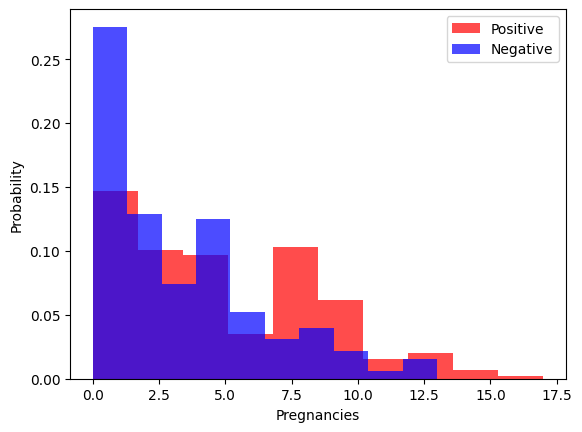

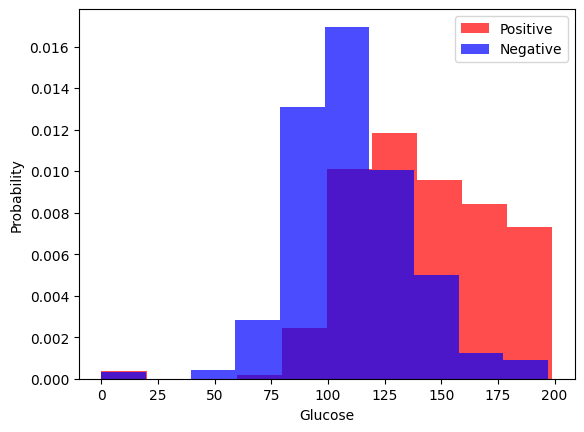

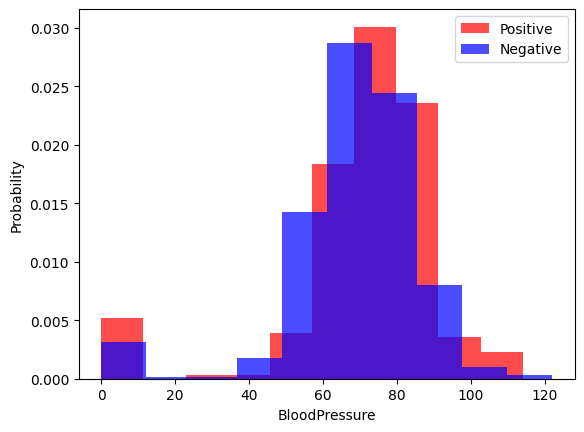

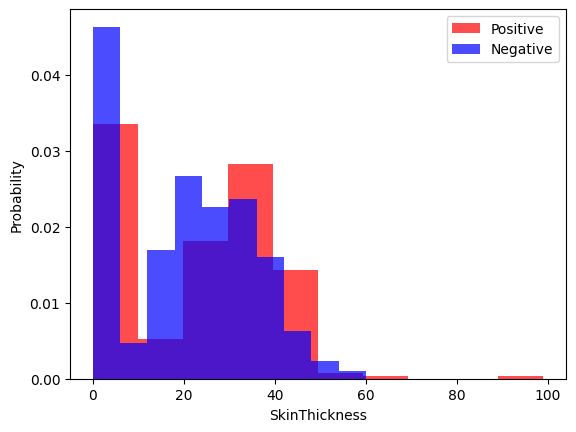

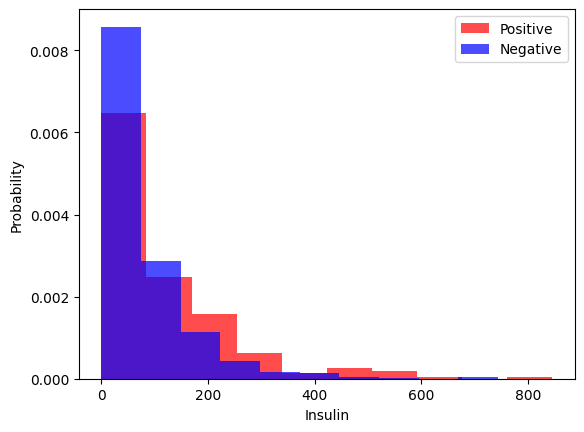

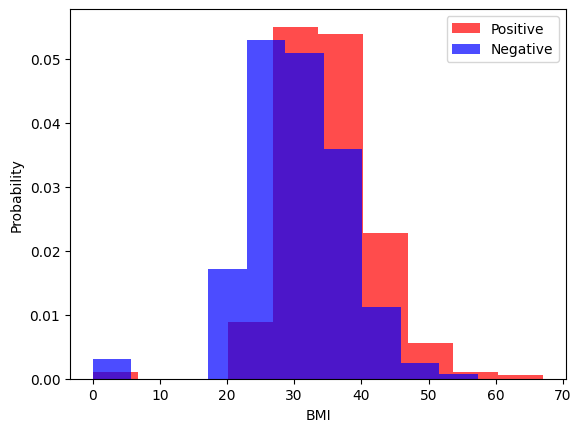

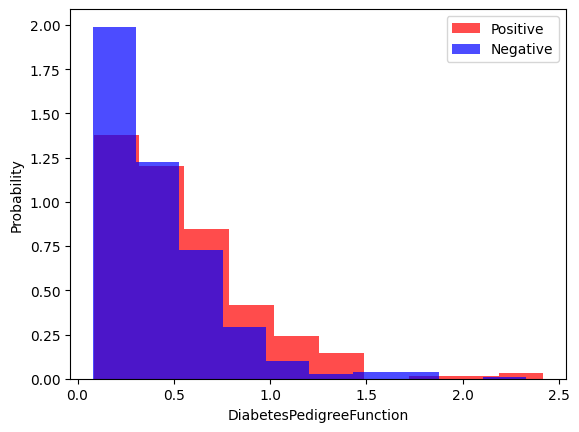

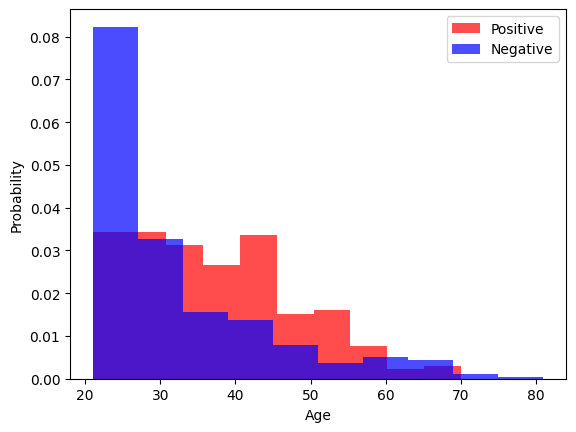

In [46]:
for lebals in df.columns[:-1]:
    plt.hist(df[df["Outcome"]==1][lebals], label='Positive', color='red', alpha=0.7, density=True)
    plt.hist(df[df["Outcome"]==0][lebals], label='Negative', color='blue', alpha=0.7, density=True)
    title = lebals
    plt.ylabel("Probability")
    plt.xlabel(lebals)
    plt.legend()
    plt.show()

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


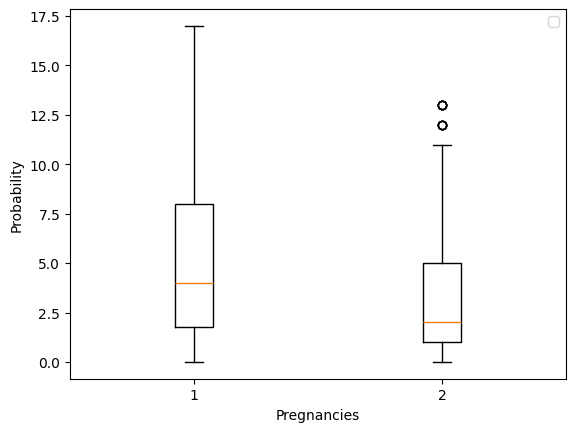

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


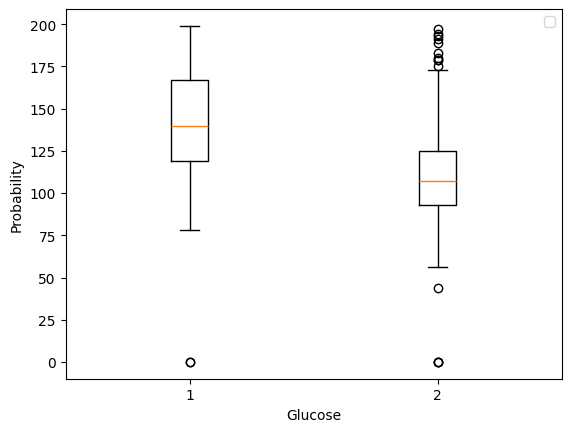

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


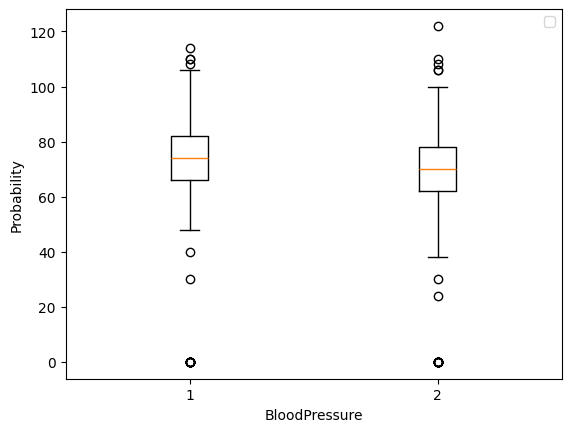

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


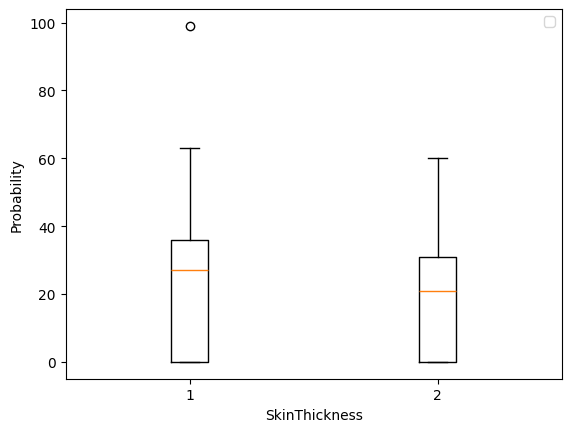

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


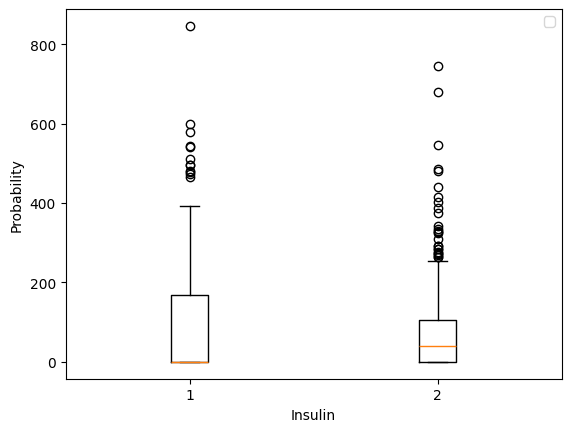

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


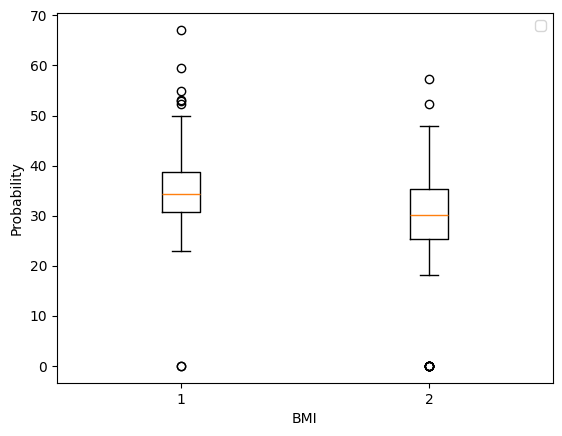

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


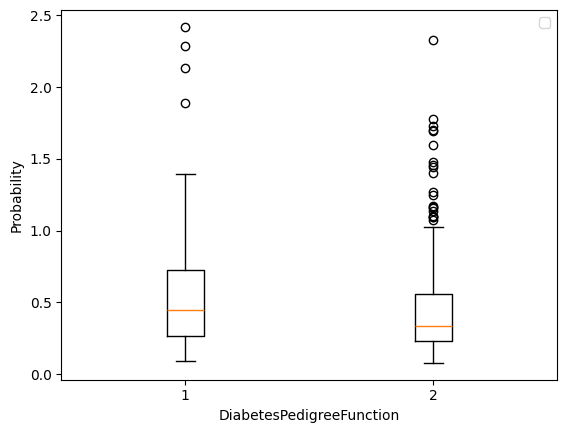

<ipython-input-47-7b86ef7ec2b0>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


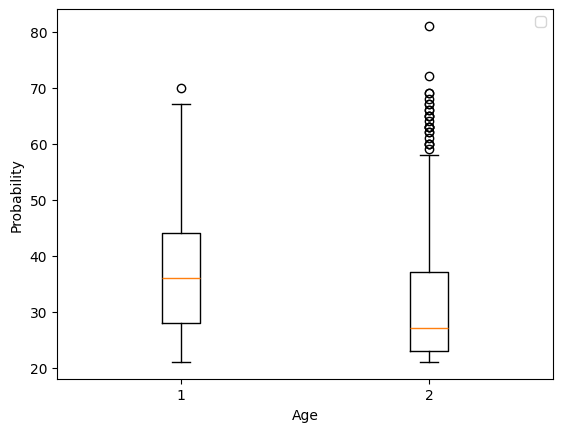

In [47]:
for lebals in df.columns[:-1]:
    plt.boxplot([df[df["Outcome"]==1][lebals], df[df["Outcome"]==0][lebals]])
    title = lebals
    plt.ylabel("Probability")
    plt.xlabel(lebals)
    plt.legend()
    plt.show()

In [48]:
for labels in df.columns[:-1]:
    plt.pie

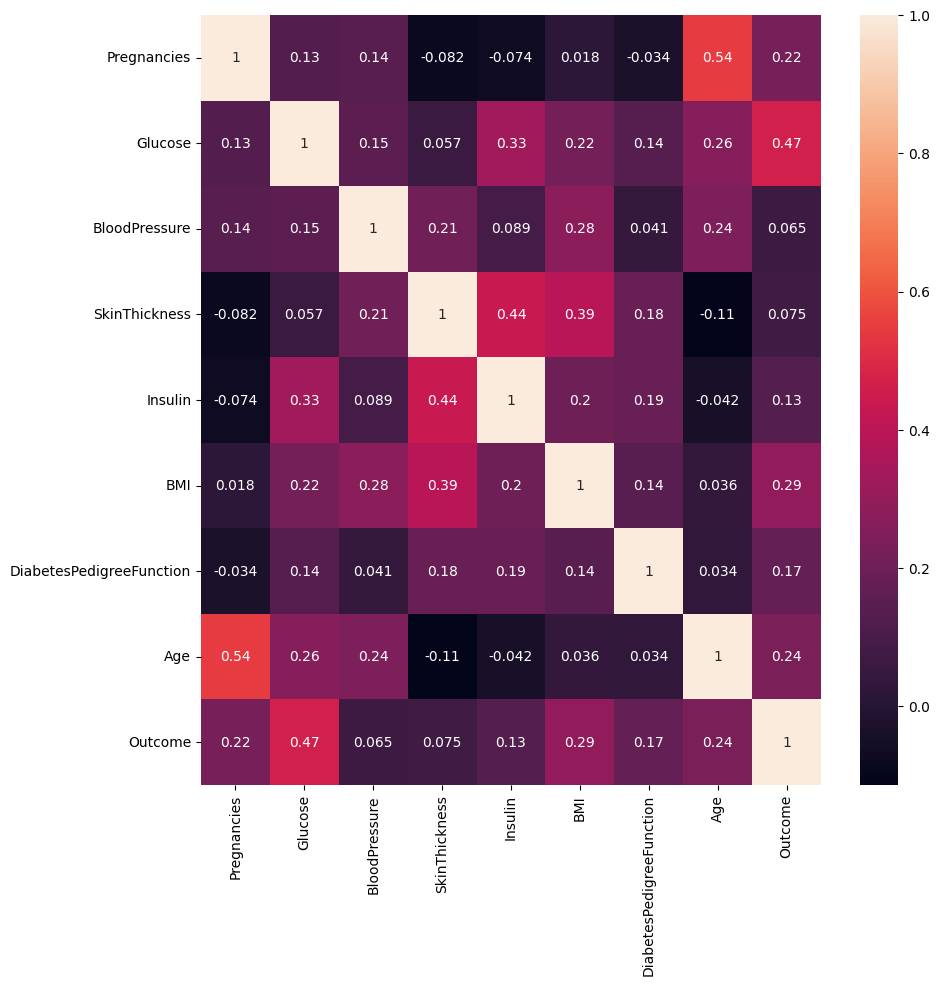

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

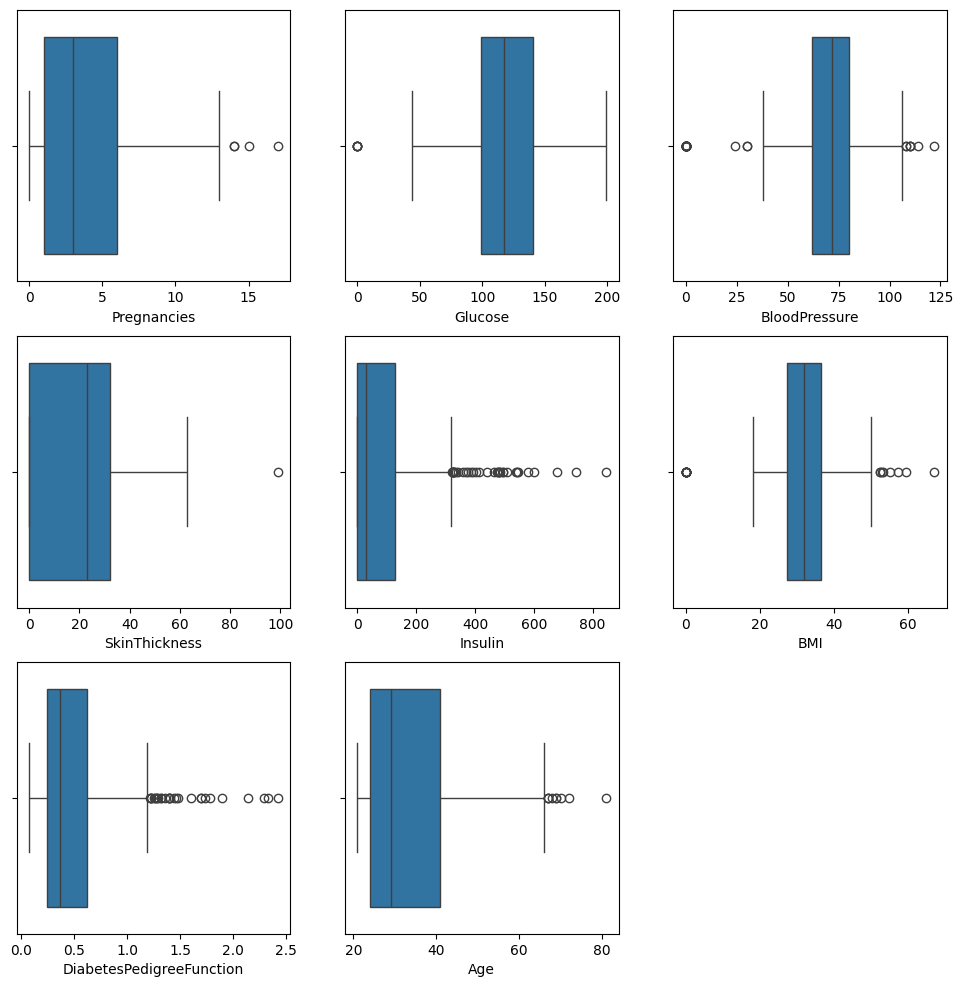

In [50]:
plt.figure(figsize=(12,12))
for i,cols in enumerate(df.columns[:-1]):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=cols,  data=df)
plt.show()

In [69]:
train, test = np.split(df.sample(frac=1), [int(0.7*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
print(len(train[train["Outcome"]==1]))
print(len(train[train["Outcome"]==0]))

191
346


In [71]:
def scale_data(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scl = StandardScaler()
    x = scl.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y


In [72]:
train, x_train, y_train=scale_data(train, oversample =True)
test, x_test, y_test=scale_data(test, oversample =False)

In [73]:
len(y_train)


692

In [74]:
sum(y_train==1)

346

In [75]:
sum(y_train==0)

346

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:

knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [131]:
y_pred = knn_model.predict(x_test)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       154
           1       0.61      0.74      0.67        77

    accuracy                           0.76       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231

